<a href="https://colab.research.google.com/github/Dewangga027/My-Internship-Journey/blob/main/Custom_CNN_Vehicle_Class_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import sys
import tensorflow as tf
print ("Python version: ", sys.version)
print("Tensor Flow version: ", tf.__version__)

Python version:  3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
Tensor Flow version:  2.17.0


In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
import cv2
print ("OpenCV version: ", cv2.__version__)

OpenCV version:  4.10.0


In [96]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab_Notebooks/praktikum2/Vehicles_Dataset.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset')  # Extract to a specific directory

In [97]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test/Bikes/Bike (701).jpg
/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test/Bikes/Bike (702).jpg
/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test/Bikes/Bike (703).jpg
/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test/Bikes/Bike (704).jpg
/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test/Bikes/Bike (705).jpg
/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test/Bikes/Bike (706).jpg
/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test/Bikes/Bike (707).jpg
/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test/Bikes/Bike (708).jpg
/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test/Bikes/Bike (709).jpg
/content/d

In [98]:
#activate if not yet installed
#pip install mplcyberpunk

import matplotlib.pyplot as plt
import pathlib, os, random, mplcyberpunk
# from keras.preprocessing.image import ImageDataGenerator
# import tensorflow as tf
# from keras.layers import BatchNormalization, Dense, Dropout, Flatten, MaxPooling2D, Conv2D, Activation

In [99]:
#Importing all the necessary libraries for image processing
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, Callback , ModelCheckpoint
from tensorflow.keras.metrics import Accuracy,binary_crossentropy, FalsePositives, FalseNegatives, TruePositives, TrueNegatives
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [100]:
datagen = ImageDataGenerator(rescale = 1.0 / 255)
img_height, img_width = 300, 300
input_shape = (img_height, img_width, 3)
batch_size = 32


train_ds = datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/train', class_mode='sparse',
            target_size=(img_height, img_width), batch_size=batch_size, subset='training')

test_ds = datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test', class_mode='sparse',
            target_size=(img_height, img_width), batch_size=batch_size, shuffle=False)

valid_ds = datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/valid', class_mode='sparse',
            target_size=(img_height, img_width), batch_size=batch_size, shuffle=False)



Found 1790 images belonging to 3 classes.
Found 300 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [101]:
#create custom model

#Defining the base model
my_model = Sequential()

#First Layer
my_model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'same', input_shape = input_shape, activation = 'relu'))
BatchNormalization()
my_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
my_model.add(Dropout(0.3))

#Second Layer
my_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu'))
BatchNormalization()
my_model.add(MaxPooling2D(pool_size = (4,4), padding = 'same'))
my_model.add(Dropout(0.3))

#Third Layer
my_model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same',activation = 'relu'))
BatchNormalization()
my_model.add(MaxPooling2D(pool_size = (4,4), padding = 'same'))
my_model.add(Dropout(0.3))


#Flattening the layers
my_model.add(Flatten())

#Adding the dense layer
my_model.add(Dense(128, activation = 'relu'))
BatchNormalization()
my_model.add(Dense(128, activation = 'relu'))
my_model.add(Dense(64, activation = 'relu'))
my_model.add(Dense(64, activation = 'relu'))
my_model.add(Dense(3, activation = 'softmax'))

my_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 300, 300, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 38, 38, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 38, 38, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 904,771 (3.45 MB)

 Trainable params: 904,771 (3.45 MB)

 Non-trainable params: 0 (0.00 B)

In [102]:
#Setting the learning rate to reduce gradually over the training period
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.001,
  decay_steps=20*50,
  decay_rate=0.5,
  staircase=False)

#Optimizer Adam or SGD
def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

In [103]:
#Creating new directory to store the best model
# os.makedirs("./Best_model_myCustomCNN2")

In [104]:
#Compiling the model
my_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), optimizer = get_optimizer(), metrics = ['sparse_categorical_accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=10)
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Colab_Notebooks/praktikum2/Best_model_myCustomCNN2/.keras",save_best_only=True,)

In [105]:
#Model is fitted using train and validation generator for 100 epochs
history = my_model.fit(train_ds, validation_data=valid_ds, epochs=15,
                       callbacks=[early_stop, checkpoint], verbose=1)

Epoch 1/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 332ms/step - loss: 1.1283 - sparse_categorical_accuracy: 0.3228 - val_loss: 1.0627 - val_sparse_categorical_accuracy: 0.6667
Epoch 2/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 223ms/step - loss: 0.9270 - sparse_categorical_accuracy: 0.5488 - val_loss: 0.5408 - val_sparse_categorical_accuracy: 0.8267
Epoch 3/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 215ms/step - loss: 0.4643 - sparse_categorical_accuracy: 0.8244 - val_loss: 0.3528 - val_sparse_categorical_accuracy: 0.8833
Epoch 4/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step - loss: 0.3084 - sparse_categorical_accuracy: 0.8841 - val_loss: 0.2900 - val_sparse_categorical_accuracy: 0.9067
Epoch 5/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 15s 249ms/step - loss: 0.2486 - sparse_categorical_accuracy: 0.9057 - val_loss: 0.2720 - val_sparse_categorical_accuracy: 0.8800
Epoch 6/15
56/56 ━━━━━━━━━━━━━━━━━━━━ 14s 226ms/step - loss: 0.1621 - sparse_categorical_accuracy: 0.9387 - val_loss: 0.1980 - val_sparse_categorical_accuracy: 0.930

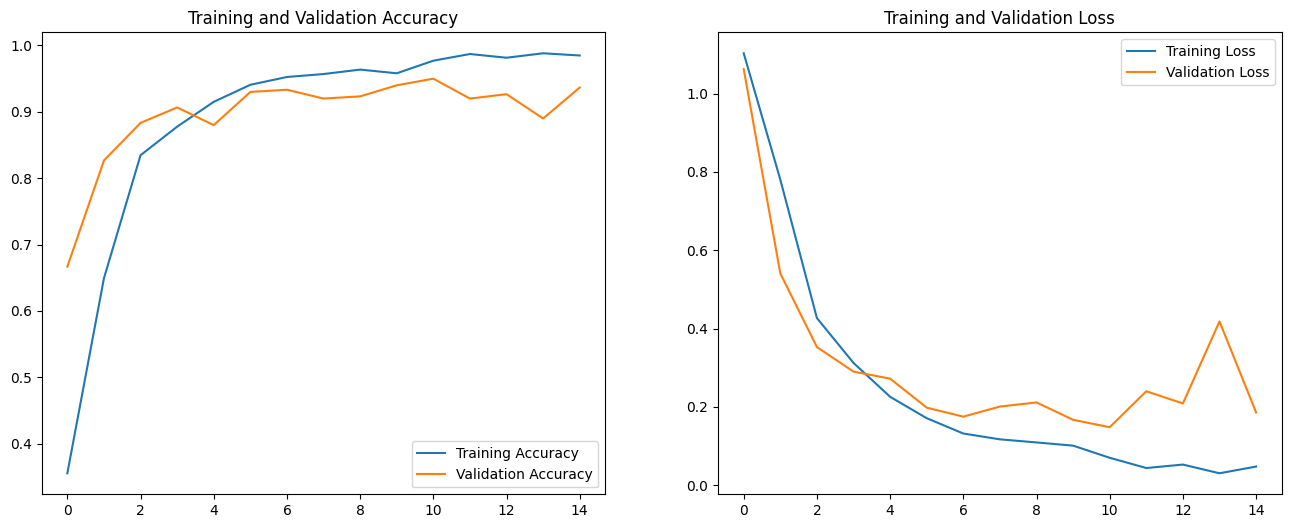

In [106]:
#Plotting the model results

#Getting the accuracy
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

#Getting the losses
loss = history.history['loss']
val_loss = history.history['val_loss']

#No of epochs it trained
epochs_range = history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [107]:
test_loss, test_acc = my_model.evaluate(test_ds)
print(f"Test accuracy: {test_acc * 100:.2f}%")

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.1236 - sparse_categorical_accuracy: 0.9504
Test accuracy: 93.00%


In [108]:
# Extract accuracy and loss data from the history object
train_acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a range for the number of epochs
epochs_range = range(1, len(train_acc) + 1)

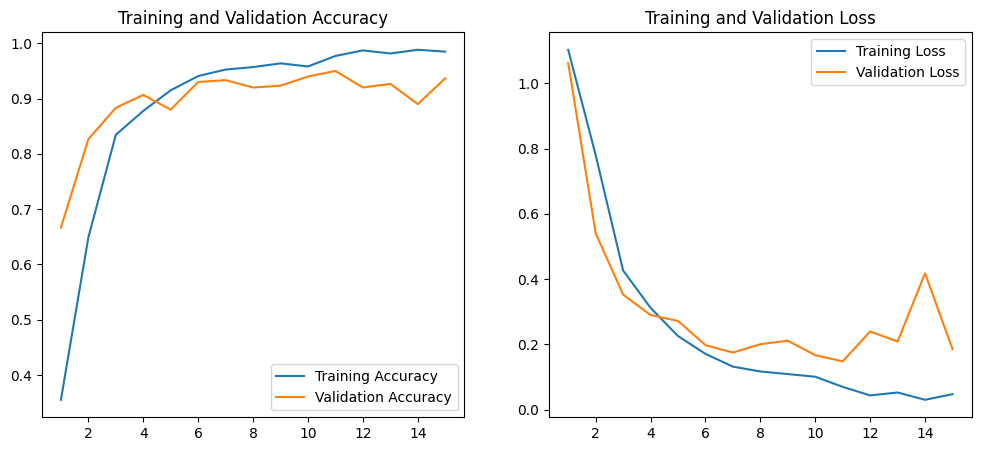

In [109]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Display the plots
plt.show()

Found 300 images belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


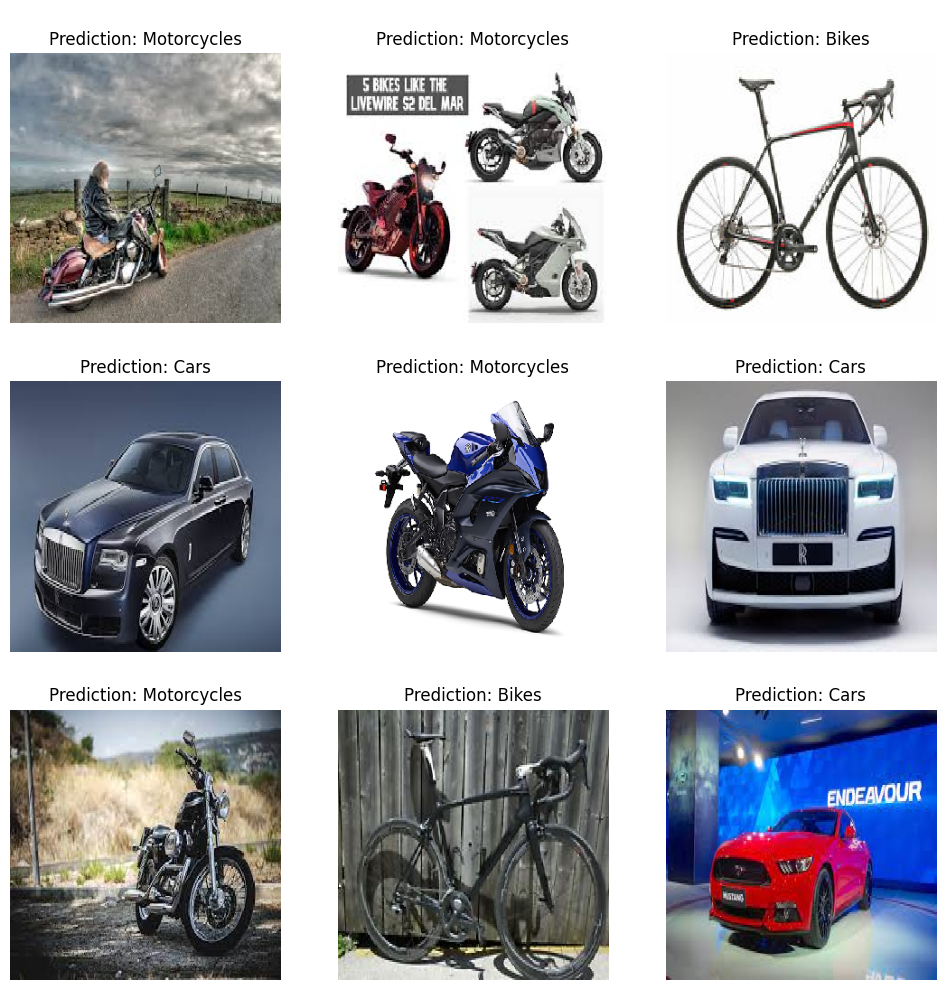

In [110]:
test_ds = datagen.flow_from_directory('/content/drive/MyDrive/Colab_Notebooks/praktikum2/vehicles_dataset/Vehicles_Dataset/test', class_mode='sparse',
            target_size=(img_height, img_width), batch_size=batch_size, shuffle=True)
categories = ["Bikes", "Cars", "Motorcycles"]


test_images, test_labels = next(test_ds)
indices = random.sample(range(len(test_images)), 9)

predictions = my_model.predict(test_images[indices])
predicted_labels = np.argmax(predictions, axis=1)


plt.figure(figsize=(10, 10))
for i, idx in enumerate(indices):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_images[idx])
    plt.axis('off')

    predicted_label = categories[predicted_labels[i]]
    plt.title(f"\nPrediction: {predicted_label}")

plt.tight_layout()
plt.show()